In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import total text
df = pd.read_csv(r'./shakes_text.csv')

In [3]:
df = df.astype(str)

In [5]:
dfx = pd.DataFrame(df)
df = dfx

In [6]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,0.0,0,0,ACT I
1,2,Henry IV,0.0,0,0,SCENE I London The palace
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant


In [8]:
# Create History Play DataFrame
# Pandas help: https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/
# List of History Plays http://shakespeare.mit.edu/works.html
# Select by Play, PlayerLine
'''Henry IV, part 1 
Henry IV, part 2
Henry V
Henry VI, part 1
Henry VI, part 2
Henry VI, part 3
Henry VIII
King John
Richard II
Richard III'''

#Return rows in 'PlayerLine' column, where rows in "Play" column = spec. plays
df_history = pd.DataFrame()

df_history = df.loc[df['Play'].isin(['Henry IV', 'Henry V', 'Henry VI', 'Henry VIII', 'King John', 'Richard II', 'Richard III'])]

df_history['Type'] = 'History'

df_history.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
0,1,Henry IV,0.0,0,0,ACT I,History
1,2,Henry IV,0.0,0,0,SCENE I London The palace,History
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...,History
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care,History
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant,History


In [9]:
df_hist = df.to_csv(r'./hist_text.csv', index = False)

In [10]:
# Create comedy play DataFrame
# List of Comedies http://shakespeare.mit.edu/works.html
'''All's Well That Ends Well
As You Like It
The Comedy of Errors
Cymbeline
Love's Labours Lost
Measure for Measure
The Merry Wives of Windsor
The Merchant of Venice
A Midsummer Night's Dream
Much Ado About Nothing
Pericles, Prince of Tyre
Taming of the Shrew
The Tempest
Troilus and Cressida
Twelfth Night
Two Gentlemen of Verona
Winter's Tale'''

df_comedy = df.loc[df['Play'].isin(["All's Well That Ends Well",'As You Like It','The Comedy of Errors','Cymbeline',"Loves Labours Lost",'Measure for Measure','The Merry Wives of Windsor','The Merchant of Venice',"A Midsummer Nights Dream",'Much Ado About Nothing','Pericles, Prince of Tyre','Taming of the Shrew','The Tempest','Troilus and Cressida','Twelfth Night','Two Gentlemen of Verona',"Winter's Tale"])]

df_comedy['Type'] = 'Comedy'

df_comedy.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
28474,28475,Cymbeline,49.0,0,AUFIDIUS,ACT I,Comedy
28475,28476,Cymbeline,49.0,0,AUFIDIUS,SCENE I Britain The garden of Cymbelines palace,Comedy
28476,28477,Cymbeline,49.0,0,AUFIDIUS,Enter two Gentlemen,Comedy
28477,28478,Cymbeline,1.0,1.1.1,First Gentleman,You do not meet a man but frowns our bloods,Comedy
28478,28479,Cymbeline,1.0,1.1.2,First Gentleman,No more obey the heavens than our courtiers,Comedy


In [11]:
df_com = df.to_csv(r'./comedy_text.csv', index = False)

In [12]:
# List of Tragedies http://shakespeare.mit.edu/works.html
'''Antony and Cleopatra
Coriolanus
Hamlet
Julius Caesar
King Lear
Macbeth
Othello
Romeo and Juliet
Timon of Athens
Titus Andronicus'''

df_tragedy = df.loc[df['Play'].isin(['Antony and Cleopatra','Coriolanus','Hamlet','King Lear','Julius Caesar','Macbeth','Othello','Romeo and Juliet','Timon of Athens','Titus Andronicus'])]

df_tragedy['Type'] = 'Tragedy'

df_tragedy.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
18565,18566,Antony and Cleopatra,52.0,0,ROSALIND,ACT I,Tragedy
18566,18567,Antony and Cleopatra,52.0,0,ROSALIND,SCENE I Alexandria A room in CLEOPATRAs palace,Tragedy
18567,18568,Antony and Cleopatra,52.0,0,ROSALIND,Enter DEMETRIUS and PHILO,Tragedy
18568,18569,Antony and Cleopatra,1.0,1.1.1,PHILO,Nay but this dotage of our generals,Tragedy
18569,18570,Antony and Cleopatra,1.0,1.1.2,PHILO,Oerflows the measure those his goodly eyes,Tragedy


In [13]:
df_trag = df.to_csv(r'./tragedy_text.csv', index = False)

In [14]:
# Create History-Comedy DataFrame
df_hist_com = pd.concat([df_history, df_comedy])
df_hist_com

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
0,1,Henry IV,0.0,0,0,ACT I,History
1,2,Henry IV,0.0,0,0,SCENE I London The palace,History
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...,History
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care,History
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant,History
...,...,...,...,...,...,...,...
107902,107903,Two Gentlemen of Verona,52.0,5.4.177,VALENTINE,Come Proteus tis your penance but to hear,Comedy
107903,107904,Two Gentlemen of Verona,52.0,5.4.178,VALENTINE,The story of your loves discovered,Comedy
107904,107905,Two Gentlemen of Verona,52.0,5.4.179,VALENTINE,That done our day of marriage shall be yours,Comedy
107905,107906,Two Gentlemen of Verona,52.0,5.4.180,VALENTINE,One feast one house one mutual happiness,Comedy


In [15]:
df_hist_com['Type'] = df_hist_com['Type'].map({"History": 0, "Comedy": 1})
df_hist_com

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
0,1,Henry IV,0.0,0,0,ACT I,0
1,2,Henry IV,0.0,0,0,SCENE I London The palace,0
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...,0
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care,0
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant,0
...,...,...,...,...,...,...,...
107902,107903,Two Gentlemen of Verona,52.0,5.4.177,VALENTINE,Come Proteus tis your penance but to hear,1
107903,107904,Two Gentlemen of Verona,52.0,5.4.178,VALENTINE,The story of your loves discovered,1
107904,107905,Two Gentlemen of Verona,52.0,5.4.179,VALENTINE,That done our day of marriage shall be yours,1
107905,107906,Two Gentlemen of Verona,52.0,5.4.180,VALENTINE,One feast one house one mutual happiness,1


In [16]:
# Create History-Tragedy DataFrame

df_hist_trag = pd.concat([df_history, df_tragedy])
df_hist_trag

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
0,1,Henry IV,0.0,0,0,ACT I,History
1,2,Henry IV,0.0,0,0,SCENE I London The palace,History
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...,History
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care,History
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant,History
...,...,...,...,...,...,...,...
99186,99187,Titus Andronicus,43.0,5.3.202,LUCIUS,See justice done on Aaron that damnd Moor,Tragedy
99187,99188,Titus Andronicus,43.0,5.3.203,LUCIUS,By whom our heavy haps had their beginning,Tragedy
99188,99189,Titus Andronicus,43.0,5.3.204,LUCIUS,Then afterwards to order well the state,Tragedy
99189,99190,Titus Andronicus,43.0,5.3.205,LUCIUS,That like events may neer it ruinate,Tragedy


In [17]:
df_hist_trag['Type'] = df_hist_trag['Type'].map({"History": 0, "Tragedy": 1})
df_hist_com

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Type
0,1,Henry IV,0.0,0,0,ACT I,0
1,2,Henry IV,0.0,0,0,SCENE I London The palace,0
2,3,Henry IV,0.0,0,0,Enter KING HENRY LORD JOHN OF LANCASTER the EA...,0
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care,0
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant,0
...,...,...,...,...,...,...,...
107902,107903,Two Gentlemen of Verona,52.0,5.4.177,VALENTINE,Come Proteus tis your penance but to hear,1
107903,107904,Two Gentlemen of Verona,52.0,5.4.178,VALENTINE,The story of your loves discovered,1
107904,107905,Two Gentlemen of Verona,52.0,5.4.179,VALENTINE,That done our day of marriage shall be yours,1
107905,107906,Two Gentlemen of Verona,52.0,5.4.180,VALENTINE,One feast one house one mutual happiness,1


In [18]:
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
# http://www.programmersought.com/article/95771313812/

In [18]:
# Logistic Regression for History/Comedy
X = df_hist_com['PlayerLine']
y = df_hist_com['Type']

In [19]:
X.shape, y.shape

((40532,), (40532,))

In [20]:
y.value_counts(normalize=True) # Baseline is 51/49

1    0.514877
0    0.485123
Name: Type, dtype: float64

In [21]:
# Cells for the model below (several) draw on NLP II lecture notebook.
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27156,), (13376,), (27156,), (13376,))

In [51]:
# Logistic Regression

cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('sc', StandardScaler(with_mean=False)),
    ('log_reg', LogisticRegression(C=1e9,solver='liblinear',penalty='l2')),
    ])

cvec_parameters = {
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__max_features': [100, 500],
    'cvec__stop_words': [None, 'english'],
    }
grid1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)


tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('sc', StandardScaler(with_mean=False)),
    ('log_reg', LogisticRegression(C=1e9,solver='liblinear',penalty='l2')),  
   ])

tvec_parameters = {
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__max_features': [100, 500],
    'tvec__stop_words': [None, 'english']
}
grid2 = GridSearchCV(tvec_pipe, tvec_parameters, cv=5, verbose=1)

In [52]:
grid1.fit(X_train, y_train)
print(grid1.best_score_)
print(grid1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   13.7s finished


0.6309471203417293
{'cvec__max_features': 500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}


In [35]:
y_preds1 = grid1.predict(X_test)
y_preds1, y_preds1.shape

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64), (13376,))

In [36]:
grid1.score(X_test, y_test)

0.6331489234449761

In [37]:
print(f'Logistic Regression predicted probabilities: {grid1.predict_proba(X_train.head())}')
print(f'Logistic Regression Accuracy Score: {grid1.score(X_test, y_test)}')

Logistic Regression predicted probabilities: [[0.72320016 0.27679984]
 [0.43675803 0.56324197]
 [0.09586617 0.90413383]
 [0.34527041 0.65472959]
 [0.56775385 0.43224615]]
Logistic Regression Accuracy Score: 0.6331489234449761


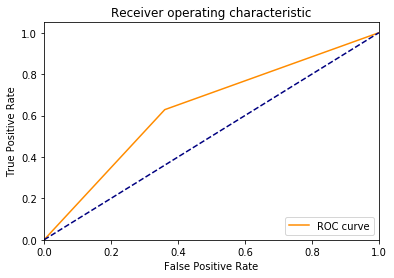

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds1, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_AUC.png')
plt.show()

In [43]:
grid2.fit(X_train, y_train)
grid2.best_score_
grid2.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   13.4s finished


{'tvec__max_features': 500,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None}

In [44]:
y_preds2 = grid2.predict(X_test)

In [45]:
grid2.score(X_test, y_test)

0.6294856459330144

In [46]:
print(f'Logistic Regression predicted probabilities: {grid2.predict_proba(X_train.head())}')
print(f'Logistic Regression Accuracy Score: {grid2.score(X_test, y_test)}')

Logistic Regression predicted probabilities: [[0.72486486 0.27513514]
 [0.40971544 0.59028456]
 [0.12036943 0.87963057]
 [0.25886746 0.74113254]
 [0.55679442 0.44320558]]
Logistic Regression Accuracy Score: 0.6294856459330144


In [48]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_preds1)))

Confusion Matrix : 
[[3595 2881]
 [2026 4874]]


In [49]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_preds2)))

Confusion Matrix : 
[[3705 2771]
 [2185 4715]]


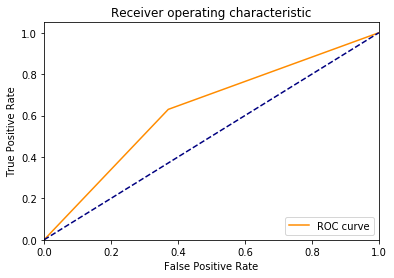

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds2, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Logistic Regression for History/Tragedy

In [42]:
X = df_hist_trag['PlayerLine']
y = df_hist_trag['Type']

In [43]:
X.shape, y.shape

((50761,), (50761,))

In [44]:
y.value_counts(normalize=True) # Baseline is 61/39

1    0.612636
0    0.387364
Name: Type, dtype: float64

In [45]:
# Cells for the model below (several) draw on NLP II lecture notebook.
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34009,), (16752,), (34009,), (16752,))

In [112]:
# Logistic Regression

cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('log_reg', LogisticRegression(C=1e9,solver = 'liblinear')),
    ])

cvec_parameters = {
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__max_features': [100, 500],
    'cvec__stop_words': [None, 'english'],
    }
grid3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)


tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log_reg', LogisticRegression(C=1e9,solver = 'liblinear')),
    ])
tvec_parameters = {
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__max_features': [100, 500],
    'tvec__stop_words': [None, 'english']
}
grid4 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [113]:
grid3.fit(X_train, y_train)
print(grid3.best_score_)
print(grid3.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   33.1s finished


0.6629127583874856
{'cvec__max_features': 500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}


In [114]:
y_preds3 = grid3.predict(X_test)
y_preds3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
grid3.score(X_test, y_test)

0.6556232091690545

In [120]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_preds3)))

Confusion Matrix : 
[[1753 4790]
 [ 979 9230]]


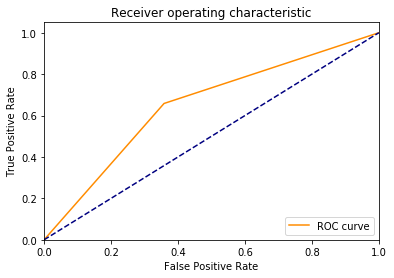

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds3, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [122]:
grid4.fit(X_train, y_train)
print(grid4.best_score_)
print(grid4.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   35.5s finished


0.6611779234908407
{'tvec__max_features': 500, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': 'english'}


In [123]:
y_preds4 = grid4.predict(X_test)
y_preds4

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
grid4.score(X_test, y_test)

0.6566977077363897

In [125]:
accuracy_score(y_test, y_preds4)

0.6566977077363897

In [126]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_preds4)))

Confusion Matrix : 
[[1859 4684]
 [1067 9142]]


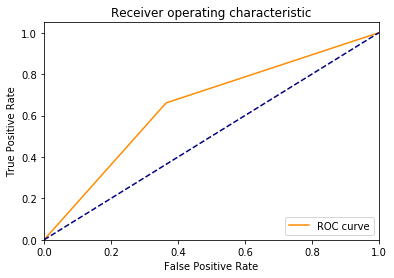

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds4, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Support Vector Classifier**

In [130]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [131]:
X = df_hist_com['PlayerLine']
y = df_hist_com['Type']

In [132]:
y.value_counts(normalize=True) # Baseline is 51/49

1    0.514877
0    0.485123
Name: Type, dtype: float64

In [133]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [63]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('SVM', SVC(kernel='poly',C=50,gamma='scale')),
    ])

cvec_parameters = {
    }
    
grid_svc1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('SVM', SVC(kernel='poly',C=50,gamma='scale')),
    ])
tvec_parameters = {
    }
grid_svc2 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [64]:
grid_svc1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_svc1.fit(X_train, y_train)
grid_svc1.best_score_
grid_svc1.best_params_

{}

In [65]:
print(f'SVC Predicted Values: {grid_svc1.predict(X_train)}')
print(f'SVC Accuracy Score: {grid_svc1.score(X_test, y_test)}')

SVC Predicted Values: [0 1 1 ... 1 1 0]
SVC Accuracy Score: 0.6293361244019139


In [140]:
grid_svc2 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_svc2.fit(X_train, y_train)
grid_svc2.best_score_
grid_svc2.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

{}

In [137]:
print(f'SVC predicted values: {grid_svc2.predict(X_train)}')
print(f'SVC Accuracy Score: {grid_svc2.score(X_test, y_test)}')

SVC predicted values: [1 1 1 ... 1 1 1]
SVC Accuracy Score: 0.5158492822966507


In [82]:
X = df_hist_trag['PlayerLine']
y = df_hist_trag['Type']

In [81]:
y.value_counts(normalize=True)

1    0.612636
0    0.387364
Name: Type, dtype: float64

In [83]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [138]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('SVM', SVC()),
    ])

cvec_parameters = {
    }
    
grid_svc3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('SVM', SVC()),
    ])
tvec_parameters = {
    }
grid_svc4 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [139]:
grid_svc3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_svc3.fit(X_train, y_train)
grid_svc3.best_score_
grid_svc3.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

{}

In [86]:
print(f'SVC Score: {grid_svc3.predict(X_train)}')
print(f'SVC Accuracy Score: {grid_svc3.score(X_test, y_test)}')

SVC Score: [1 1 1 ... 1 1 1]
SVC Accuracy Score: 0.609419770773639


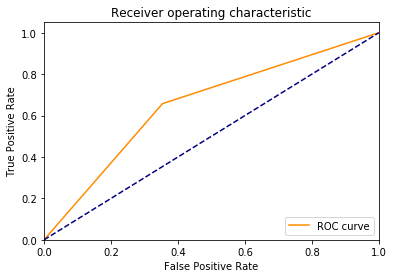

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds3, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [88]:
grid_svc4 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_svc4.fit(X_train, y_train)
grid_svc4.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

{}

In [89]:
print(f'SVC Score: {grid_svc4.predict(X_train)}')
print(f'SVC Accuracy Score: {grid_svc4.score(X_test, y_test)}')

SVC Score: [1 1 1 ... 1 1 1]
SVC Accuracy Score: 0.609419770773639


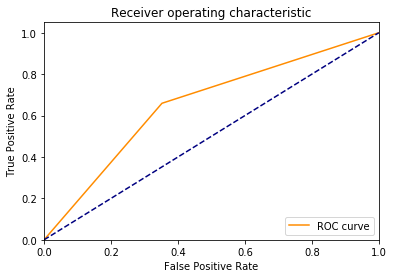

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_preds4, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**K Nearest Neighbors**

In [ ]:
X = df_hist_com['PlayerLine']
y = df_hist_com['Type']

In [ ]:
y.value_counts(normalize=True)

In [ ]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [ ]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')),
    ])

cvec_parameters = {
    }

    
grid_KNN1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan'))),
    ])

tvec_parameters = {
    }

grid_KNN2 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [ ]:
grid_KNN1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_KNN1.fit(X_train, y_train)
grid_KNN1.best_params_

In [ ]:
print(f'KNN Train Score: {grid_KNN1.predict(X_train)}')
print(f'KNN Test Score: {grid_KNN1.predict(X_test)}')
print(f'KNN Accuracy Score: {grid_KNN1.score(X_test, y_test)}')

In [ ]:
grid_KNN2 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_KNN2.fit(X_train, y_train)
grid_KNN2.best_params_

In [ ]:
print(f'KNN Train Score: {grid_KNN2.predict(X_train)}')
print(f'KNN Test Score: {grid_KNN2.predict(X_train)}')
print(f'KNN Accuracy Score: {grid_KNN2.score(X_test, y_test)}')

In [ ]:
X = df_hist_trag['PlayerLine']
y = df_hist_trag['Type']

In [ ]:
y.value_counts(normalize=True)

In [ ]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [ ]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('KNN', KNeighborsClassifier()),
    ])

cvec_parameters = {
    }
    
grid_KNN3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier()),
    ])
tvec_parameters = {
    }
grid_KNN4 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [ ]:
grid_KNN3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_KNN3.fit(X_train, y_train)
grid_KNN3.best_params_

In [ ]:
print(f'KNN Score: {grid_KNN3.predict(X_train)}')
print(f'KNN Test Score: {grid_KNN3.predict(X_test)}')
print(f'KNN Accuracy Score: {grid_KNN3.score(X_test, y_test)}')

In [ ]:
grid_KNN4 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_KNN4.fit(X_train, y_train)
grid_KNN4.best_params_

In [ ]:
print(f'KNN Train Score: {grid_KNN4.predict(X_train)}')
print(f'KNN Test Score: {grid_KNN4.predict(X_test)}')
print(f'KNN Accuracy Score: {grid_KNN4.score(X_test, y_test)}')

**Random Forest**

In [67]:
X = df_hist_com['PlayerLine']
y = df_hist_com['Type']

In [68]:
y.value_counts(normalize=True)

1    0.514877
0    0.485123
Name: Type, dtype: float64

In [69]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [77]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('RF', RandomForestClassifier(n_estimators= 'warn',
    max_features= 'auto',
    min_samples_split= 2)),
    ])

cvec_parameters = {
   
    }
    
grid_RF1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('RF', RandomForestClassifier(n_estimators= 'warn',
    max_features= 'auto',
    min_samples_split= 2)),
    ])
tvec_parameters = {
   
    }
grid_RF2 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [78]:
grid_RF1 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_RF1.fit(X_train, y_train)
grid_RF1.best_score_
grid_RF1.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

{}

In [79]:
print(f'RF Train Score: {grid_RF1.predict(X_train)}')
print(f'RF Test Score: {grid_RF1.predict(X_test)}')
print(f'RF Accuracy Score: {grid_RF1.score(X_test, y_test)}')

RF Train Score: [0 1 1 ... 1 1 0]
RF Test Score: [0 1 1 ... 1 1 1]
RF Accuracy Score: 0.640625


In [ ]:
grid_RF2 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_RF2.fit(X_train, y_train)
grid_RF2.best_score_
grid_RF2.best_params_

In [ ]:
print(f'RF Predict Score: {grid_RF2.predict(X_test)}')
print(f'RF Accuracy Score: {grid_RF2.score(X_test, y_test)}')

In [141]:
X = df_hist_trag['PlayerLine']
y = df_hist_trag['Type']

In [142]:
y.value_counts(normalize=True)

1    0.612636
0    0.387364
Name: Type, dtype: float64

In [143]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [84]:
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('RF', RandomForestClassifier(n_estimators= 'warn',
    max_features= 'auto',
    min_samples_split= 2)),
    ])

cvec_parameters = {
    }
    
grid_RF3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5, verbose=1)

tfid_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('RF', RandomForestClassifier(n_estimators= 'warn',
    max_features= 'auto',
    min_samples_split= 2)),
    ])
tvec_parameters = {
    }
grid_RF4 = GridSearchCV(tfid_pipe, tvec_parameters, cv=5, verbose=1)

In [85]:
grid_RF3 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_RF3.fit(X_train, y_train)
grid_RF3.best_score_
grid_RF3.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

{}

In [87]:
print(f'RF Predict: {grid_RF3.predict(X_test)}')
print(f'RF Accuracy Score: {grid_RF3.score(X_test, y_test)}')

RF Predict: [1 1 1 ... 1 0 1]
RF Accuracy Score: 0.6393540669856459


In [88]:
grid_RF4 = GridSearchCV(cvec_pipe, cvec_parameters, cv=5)
grid_RF4.fit(X_train, y_train)
grid_RF4.best_score_
grid_RF4.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

{}

In [90]:
print(f'RF Predict: {grid_RF4.predict(X_test)}')
print(f'RF Accuracy Score: {grid_RF4.score(X_test, y_test)}')

RF Predict: [0 1 1 ... 1 1 1]
RF Accuracy Score: 0.6406997607655502
